VGGNET

Found 723 images belonging to 86 classes.
Found 235 images belonging to 86 classes.
Epoch 1/50


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 888ms/step - accuracy: 0.0080 - loss: 4.6816 - val_accuracy: 0.0255 - val_loss: 4.4043
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 897ms/step - accuracy: 0.0104 - loss: 4.4488 - val_accuracy: 0.0170 - val_loss: 4.3690
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 902ms/step - accuracy: 0.0116 - loss: 4.4400 - val_accuracy: 0.0638 - val_loss: 4.3430
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 968ms/step - accuracy: 0.0158 - loss: 4.3937 - val_accuracy: 0.1064 - val_loss: 4.2731
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 991ms/step - accuracy: 0.0400 - loss: 4.3215 - val_accuracy: 0.1745 - val_loss: 4.1728
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.0572 - loss: 4.2184 - val_accuracy: 0.2128 - val_loss: 4.0437
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 989ms/step - accuracy: 0.0548 - loss: 4.1295 - val_accuracy: 0.2213 - val_loss: 3.8770
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 985ms/step - accuracy: 0.0826 - loss: 4.0392 - val_accuracy: 0.2766 -

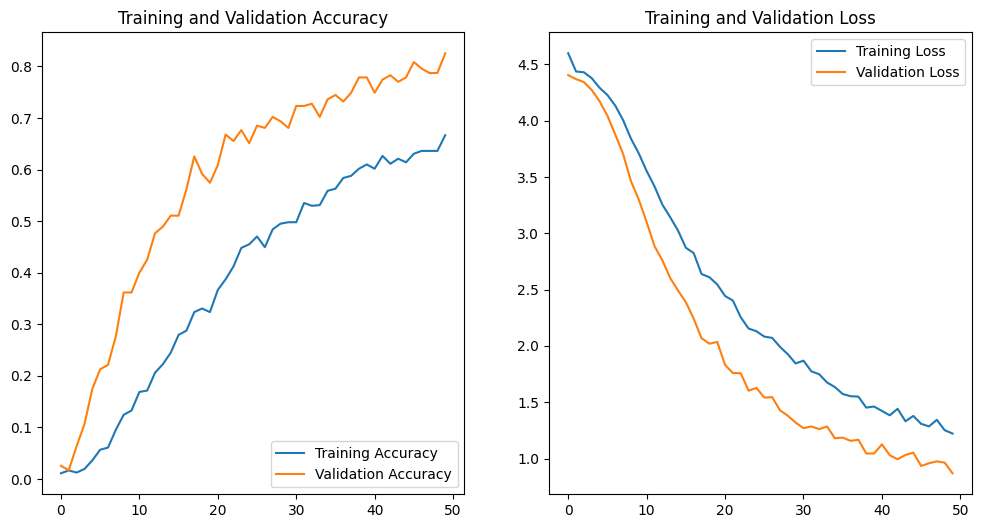

In [2]:
import os
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Specify the directory containing the converted .png files
data_dir = r'Z:\code\python-facog\converted_images'  # Single directory for both training and validation

# Define the image size and batch size
image_size = (224, 224)  # Adjust as needed
batch_size = 32  # Adjust as needed

# Create ImageDataGenerator with validation split, Augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=258/958  # 258 images for validation, 700 for training
)

# Data generator for training set
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',  # Training data
    shuffle=True
)

# Data generator for validation set
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',  # Validation data
    shuffle=True
)

# Load the VGG16 model, excluding the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers of VGG16 so that their weights are not updated during training
base_model.trainable = False

# Create a Sequential model and add the VGG16 base model
model = Sequential()

# Add the VGG16 base model
model.add(base_model)

# Add custom layers on top for your specific task
model.add(GlobalAveragePooling2D())  # Global pooling layer to reduce dimensionality
model.add(Dense(512, activation='relu'))  # Add a fully connected layer with 512 units
model.add(Dropout(0.5))  # Add dropout for regularization
model.add(Dense(256, activation='relu'))  # Another fully connected layer
model.add(Dropout(0.5))  # Add dropout for regularization
model.add(Dense(train_generator.num_classes, activation='softmax'))  # Final output layer

# Compile the model with your desired settings
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Set the number of epochs
epochs = 100  # You can adjust based on performance

# Train the model and store the history
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

# Function to plot the training history
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

# Save the model if needed
model.save('face_recognition_with_vggnet.keras')

# Plot the history
plot_history(history)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


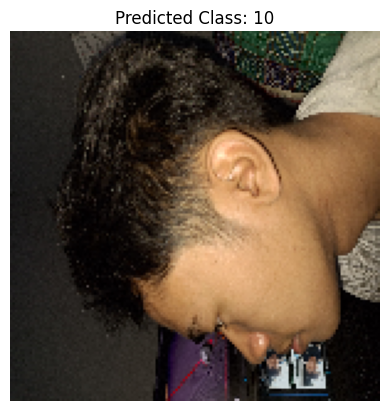

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


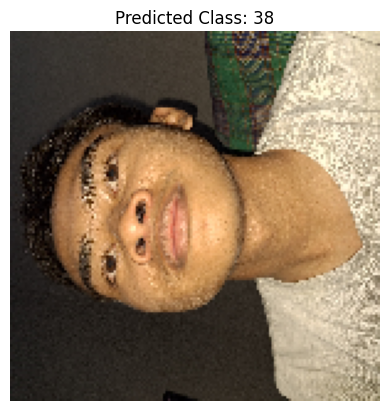

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


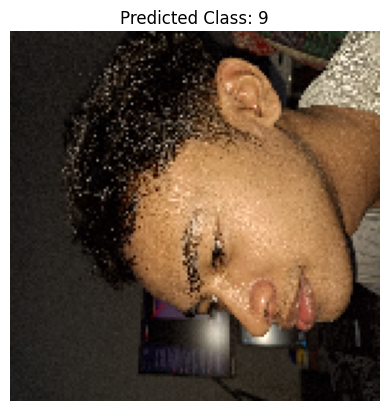

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


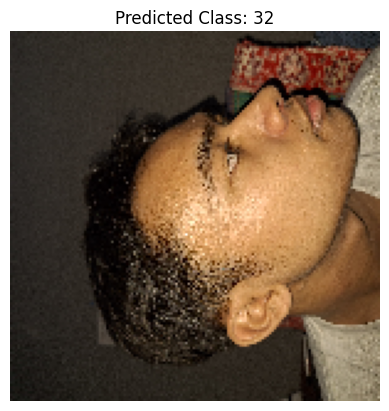

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


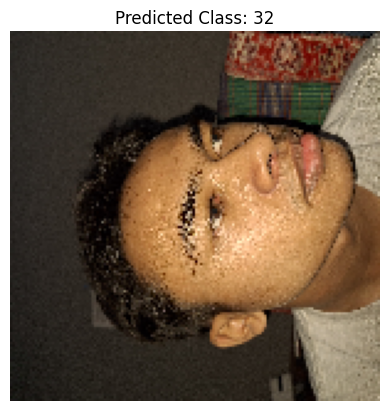

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


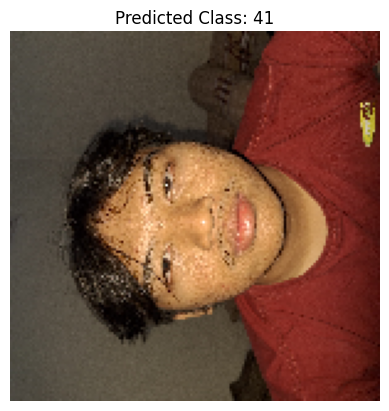

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


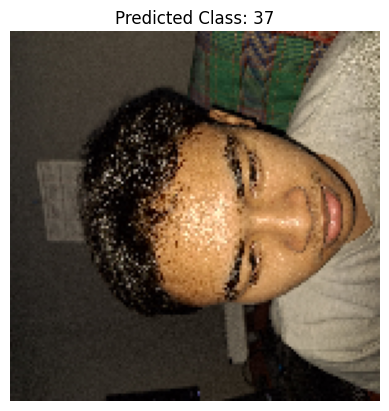

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


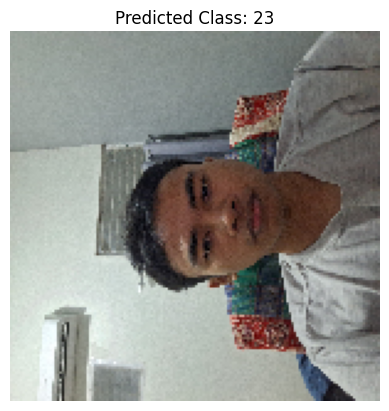

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


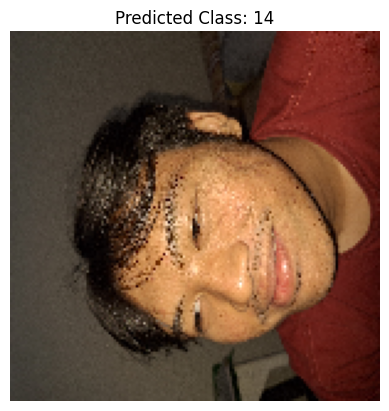

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


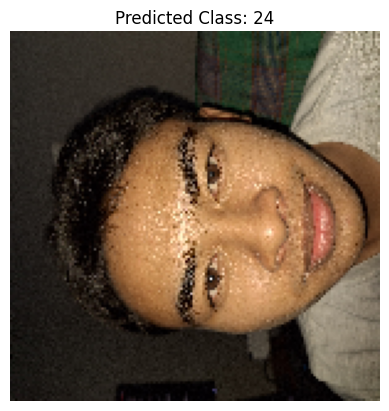

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


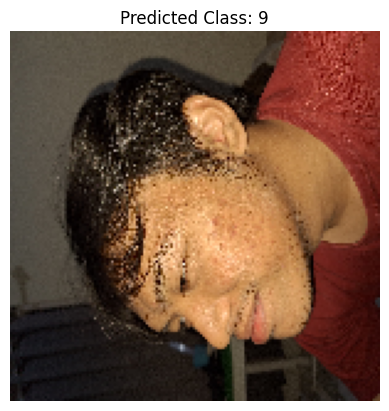

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


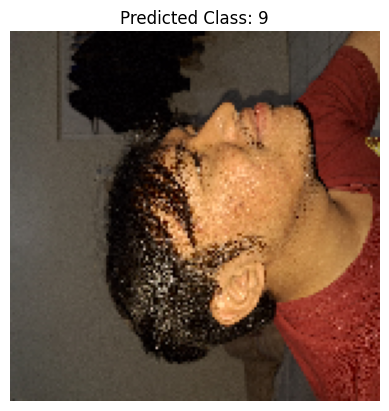

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


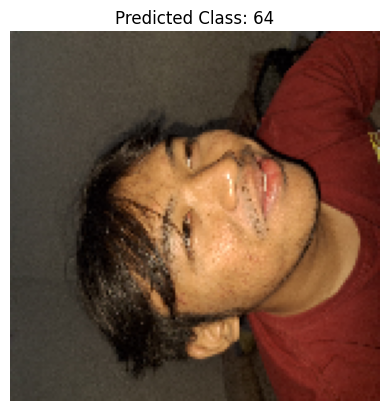

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


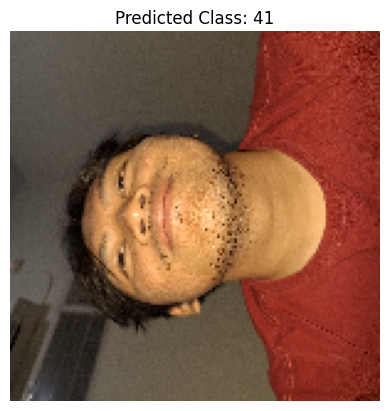

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


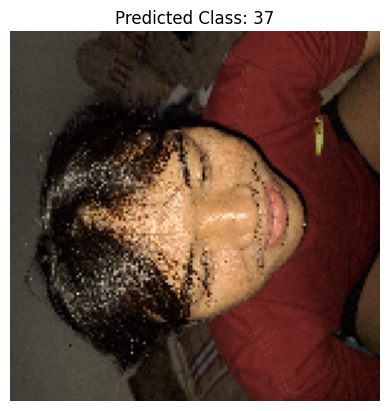

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


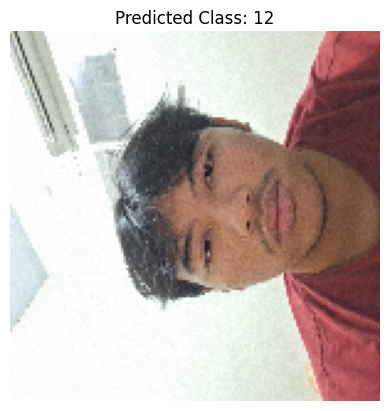

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


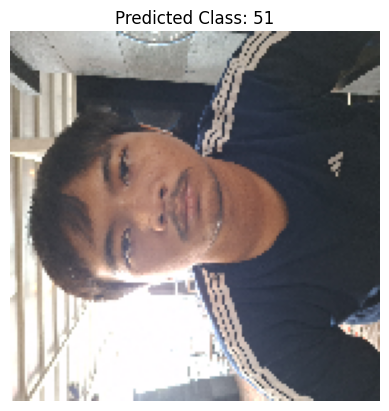

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


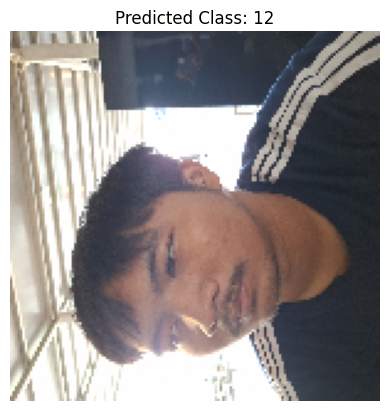

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


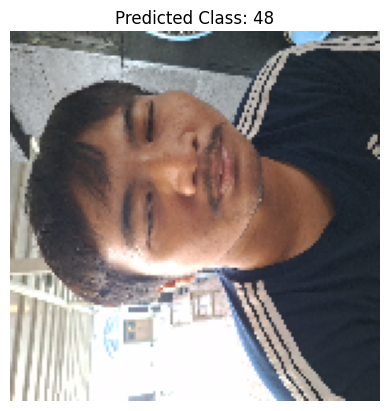

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


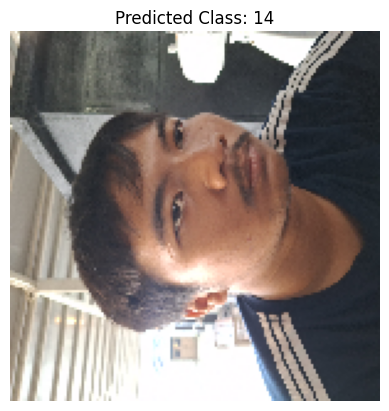

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


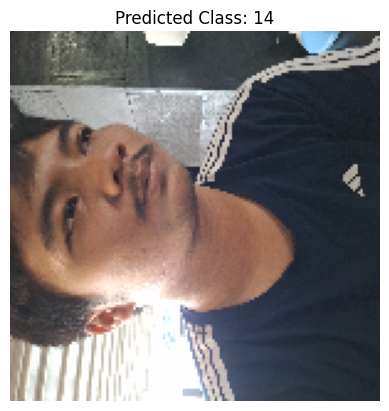

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


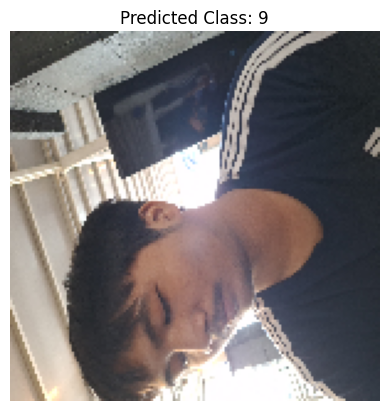

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


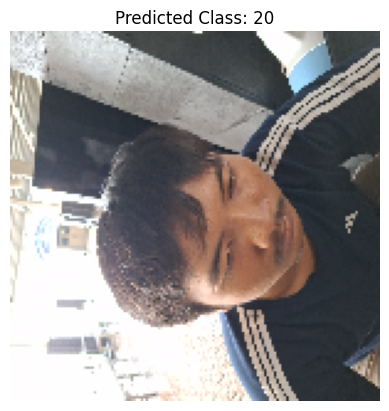

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


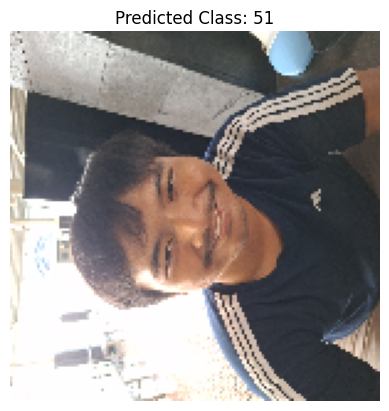

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


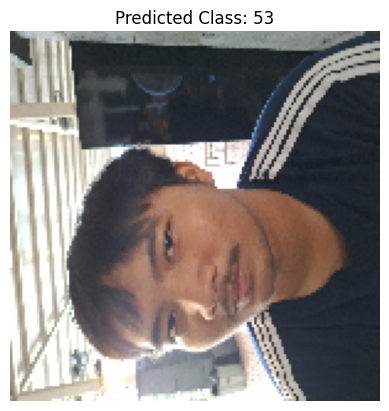

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


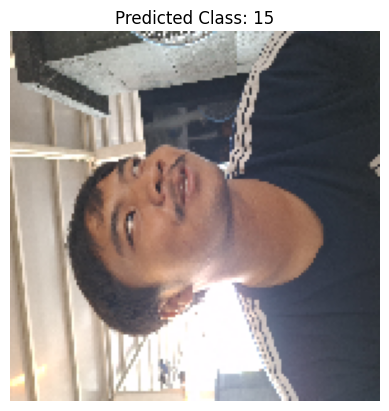

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


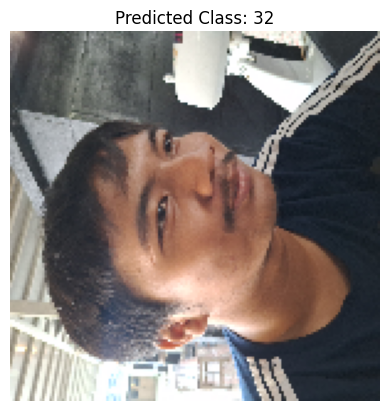

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import glob

# Load the model
model = load_model('face_recognition_with_vggnet.keras')

# Function to predict and display an image
def predict_and_display_image(img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(150, 150))  # Adjust size if needed
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale as done during training

    # Make prediction
    preds = model.predict(img_array)
    predicted_class = np.argmax(preds, axis=1)[0]

    # Display the image with prediction
    plt.imshow(img)
    plt.title(f'Predicted Class: {predicted_class}')  # Adjust to show class name if needed
    plt.axis('off')  # Turn off axis
    plt.show()

# Path to the images
test_image_path_pattern = r'Z:\code\python-facog\sample_data\*.jpg'

# Retrieve all image paths that match the pattern
test_image_paths = glob.glob(test_image_path_pattern)

# Loop through each image and display the prediction
for test_image_path in test_image_paths:
    predict_and_display_image(test_image_path)
